# Лабораторная работа 2

#### Работу выполнил: Зыкин Андрей, студент группы ПИм-2

## Классификация текстов

**Задание 1.** Загрузите в датафрейм новостной датасет `lenta_ru_news_filtered.csc`, собранный на базе корпуса `lenta.ru v1.0`. В датасете каждая новость описывается следующими полями:
* **url** - адрес новости на сайте `lenta.ru`,
* **topic** - тема новости,
* **title** - заголовок новости,
* **text** - текст новости.

Выполните следующие задания:
1. Вычислите сколько новостных текстов в новостном датасете?
2. Определите какие темы встречаются у новостей из датасета?
3. Постройте график распределения текстов по темам (данные отсортированы по количеству текстов в теме)
4. Постройте графики распределений длин текстов в датасете для каждой из тем (данные отсортированы по длине текстов). Нужно построить несолько графиков на одной области.

`*` - не забывайте правильно оформить графики

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

news = pd.read_csv('/content/lenta_ru_news_filtered (1).csv')

In [ ]:
news.head(5)

,Unnamed: 0,url,topic,title,text
0,34,https://lenta.ru/news/2018/12/15/putinrap/,Культура,Путин предостерег от запретов рэп-концертов,"Президент России Владимир Путин, выступая на з..."
1,52,https://lenta.ru/news/2018/12/15/cirk/,Культура,Путин пообещал поразбираться с Cirque du Solei...,Владимир Путин пообещал разобраться с открытие...
2,53,https://lenta.ru/news/2018/12/15/asomov/,Культура,Умер актер «Кривого зеркала»,В Ташкенте скончался участник юмористической т...
3,57,https://lenta.ru/news/2018/12/14/zinchuk/,Культура,Зинчук рассказал подробности аварии и призвал ...,"Гитарист-виртуоз и композитор Виктор Зинчук, г..."
4,63,https://lenta.ru/news/2018/12/14/bydlo/,Культура,За сравнившего с быдлом зрителей актера «Униве...,"Коллеги актера Андрея Гайдуляна, известного по..."


In [ ]:
news.tail(5)

,Unnamed: 0,url,topic,title,text
3995,19915,https://lenta.ru/news/2018/07/09/zakladnaya/,Экономика,Отсутствие подзаконных актов помешало банкам р...,Российские банки пока не получили возможности ...
3996,19931,https://lenta.ru/news/2018/07/09/tram/,Экономика,Россиянам представили «секретный» трамвай,"«Уралвагонзавод» (УВЗ), входящий в состав «Рос..."
3997,19935,https://lenta.ru/news/2018/07/09/poroh/,Экономика,Украина захотела спасти Европу от «Северного п...,"Президент Украины Петр Порошенко считает, что ..."
3998,19941,https://lenta.ru/news/2018/07/09/cb_like_fcb/,Экономика,Центробанку разрешат проводить обыски,Банк России может получить разрешение беспрепя...
3999,19944,https://lenta.ru/news/2018/07/09/vodka/,Экономика,Россиян оставили без дешевой водки,Минфин уравнял минимальную розничную цену (МРЦ...


In [ ]:
uniq_topic = news['topic'].unique()
uniq_topic

array(['Культура', 'Экономика'], dtype=object)

In [2]:
print("1. Всего новостных текстов:", len(news))

NameError: name 'news' is not defined

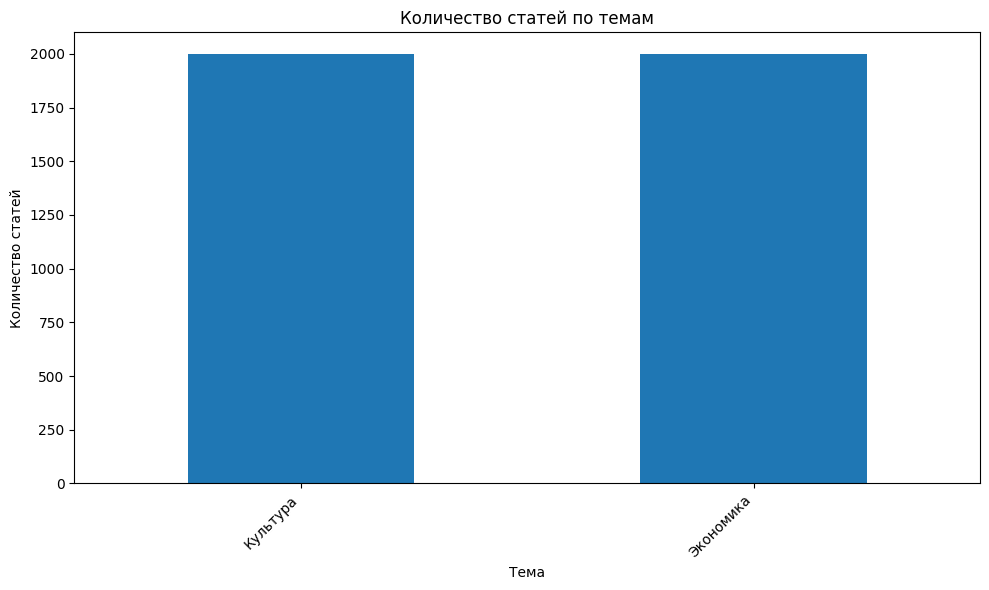

In [ ]:
topic_counts = news['topic'].value_counts()

# Построение столбчатого графика
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.title('Количество статей по темам')
plt.xlabel('Тема')
plt.ylabel('Количество статей')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показать график
plt.show()

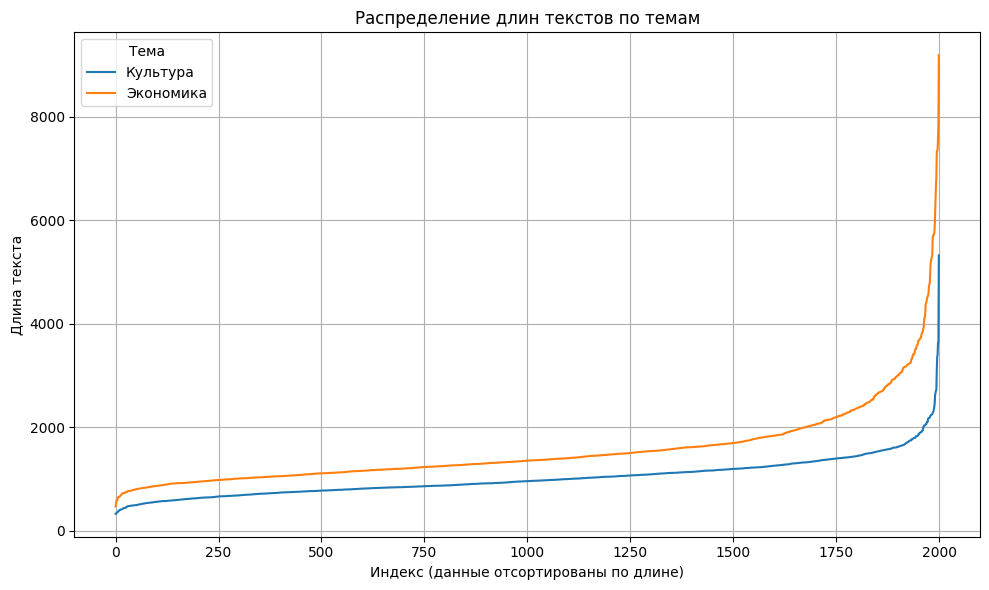

In [ ]:
news['text_length'] = news['text'].apply(len)

# Уникальные темы
topics = news['topic'].unique()

# Создание фигуры и осей для нескольких графиков на одной области
plt.figure(figsize=(10, 6))

# Построение графиков распределений для каждой темы
for topic in topics:
    # Фильтрация данных по теме
    topic_data = news[news['topic'] == topic]
    # Сортировка по длине текста
    topic_data = topic_data.sort_values(by='text_length')

    # Построение графика
    plt.plot(topic_data['text_length'].values, label=topic)

# Настройки графика
plt.title('Распределение длин текстов по темам')
plt.xlabel('Индекс (данные отсортированы по длине)')
plt.ylabel('Длина текста')
plt.legend(title="Тема")
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()

**Задание 2.** Подсчитайте частоту встречаемости слов новостных текстов в датафрейме.

Какие слова употребляются наиболее часто в целом во всех новостных текстах, а какие слова употребляются в новостных текстах относительно тем (выведите топ-50 слов для каждого из случаев)?

In [ ]:
from collections import Counter
import re

# Функция для очистки текста от знаков пунктуации и приведения к нижнему регистру
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Убираем пунктуацию
    text = text.lower()  # Приводим к нижнему регистру
    return text

# Применение очистки к столбцу с текстом
news['cleaned_text'] = news['text'].apply(preprocess_text)

# Подсчет частоты слов для всех новостных текстов
all_text = ' '.join(news['cleaned_text'].values)
all_words = all_text.split()
overall_word_counts = Counter(all_words)

# Преобразование частоты слов для всех текстов в DataFrame
overall_word_freq_df = pd.DataFrame(overall_word_counts.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Вывод топ-50 слов для всех новостных текстов
top_50_overall = overall_word_freq_df.head(50)
print("Топ-50 слов во всех новостных текстах:")
print(top_50_overall)

# Подсчет частоты слов для каждой темы
topics = news['topic'].unique()
top_words_by_topic = {}

for topic in topics:
    # Фильтрация данных по теме
    topic_data = news[news['topic'] == topic]

    # Объединение всех текстов по теме
    topic_text = ' '.join(topic_data['cleaned_text'].values)
    topic_words = topic_text.split()

    # Подсчет частоты слов для текущей темы
    topic_word_counts = Counter(topic_words)

    # Преобразование частоты слов в DataFrame
    topic_word_freq_df = pd.DataFrame(topic_word_counts.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

    # Сохранение топ-50 слов по теме
    top_words_by_topic[topic] = topic_word_freq_df.head(50)

# Вывод топ-50 слов для каждой темы
for topic, top_words in top_words_by_topic.items():
    print(f"\nТоп-50 слов для темы '{topic}':")
    print(top_words)

Топ-50 слов во всех новостных текстах:
           word  frequency
23            в      32584
10            и      16616
5            на      14799
53          что       8354
131           с       7341
8            по       7081
31           не       5560
102          за       3247
83           из       3195
33           он       3141
46            о       3048
22         этом       3040
220        года       3008
569         для       2766
97          как       2576
99            к       2570
1        россии       2556
21           об       2515
92          его       2510
116       также       2480
160         это       2396
115           а       2354
154        году       2009
306          от       2008
788          до       1947
1106     рублей       1618
3296  процентов       1558
18            у       1527
42        будет       1346
1283   компании       1295
196           я       1287
143         при       1269
374       после       1241
170      словам       1240
241         она 

**Задание 3.** Обработайте тексты с помощью морфологического анализатора. Уберите стоп-слова. И повторите задание 2 для текстов из слов, приведённых в начальную форму. Сравните списки топ-50 из второго и третьего заданий. Сделайте выводы.

In [ ]:
from pymystem3 import Mystem

mystem = Mystem()

stop_words = set()  # Здесь добавьте ваш список стоп-слов
with open('/content/stopwords-ru.txt', 'r', encoding='utf-8') as f:
    stop_words = set(f.read().split())

def preprocess_text(text):

    # Лемматизация текста
    lemmas = mystem.lemmatize(text.lower())
    # Объединяем леммы в строку и удаляем неалфавитные символы
    lemmas = ''.join(lemmas)
    lemmas = re.sub(r'[^а-яё\s]', '', lemmas)
    # Разделяем текст на слова
    words = lemmas.split()
    # Удаляем стоп-слова и слова короче 3 символов (по желанию)
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    return filtered_words

# Применение предобработки ко всем текстам в DataFrame
news['processed_text'] = news['text'].apply(preprocess_text)

In [ ]:
# Объединяем все слова из столбца 'text'
all_words = ' '.join(news['text']).lower()
# Удаляем неалфавитные символы
all_words = re.sub(r'[^а-яё\s]', '', all_words)
words = all_words.split()

# Подсчет частотности
word_counts_original = Counter(words)
top_50_original = word_counts_original.most_common(50)

# Объединяем все обработанные слова
all_processed_words = [word for sublist in news['processed_text'] for word in sublist]

# Подсчет частотности
word_counts_processed = Counter(all_processed_words)
top_50_processed = word_counts_processed.most_common(50)

# Преобразуем списки в DataFrame для удобства сравнения
df_original = pd.DataFrame(top_50_original, columns=['word', 'count_original'])
df_processed = pd.DataFrame(top_50_processed, columns=['word', 'count_processed'])

# Объединяем два DataFrame по словам
df_comparison = pd.merge(df_original, df_processed, on='word', how='outer').fillna(0)

# Сортируем по убыванию частоты в оригинальных данных
df_comparison = df_comparison.sort_values(by='count_original', ascending=False)

print("\nТоп-50 слов с лемматизацией и удалением стоп-слов:\n", df_processed)


Топ-50 слов с лемматизацией и удалением стоп-слов:
               word  count_processed
0          процент             2868
1         компания             2665
2       российский             2231
3            рубль             2220
4         сообщать             2056
5      становиться             1822
6         заявлять             1612
7           доллар             1583
8         отмечать             1561
9         миллиард             1438
10            цена             1241
11             сша             1212
12          проект             1178
13           фильм             1174
14    рассказывать             1115
15         миллион             1108
16        получать             1098
17      составлять             1075
18           рынок             1073
19          тысяча             1067
20       президент              968
21           ранее              967
22    американский              957
23           актер              928
24          группа              924
25         

In [ ]:
print("\nСравнение топ-50 слов:\n", df_comparison)


Сравнение топ-50 слов:
              word  count_original  count_processed
0               в         32585.0              0.0
1               и         16616.0              0.0
2              на         14801.0              0.0
3             что          8354.0              0.0
4               с          7349.0              0.0
..            ...             ...              ...
69      президент             0.0            968.0
70          ранее             0.0            967.0
71   американский             0.0            957.0
72          актер             0.0            928.0
98  правительство             0.0            587.0

[99 rows x 3 columns]


**Задание 4.** Разделите новостной датасет на обучающую и тестовую выборки. Постройте три классификатора, каждый из которых определяет тему новостного текста (модели выбирайте в соответствии со своими навыками). Сравните точности получившихся трёх классификаторов на тестовой и обучающей выборках, сделайте выводы.

Вектор признаков предлагается строить по аналогии как в примере из раздела `"Классификация текстов"` 12 главы `"Инструментарий естественного языка"` книги `"Основы python для data science"` (страницы `207`-`211`).

In [ ]:
# ваш код